In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')
df = df.drop(columns=['Date','Location',])
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
fromfrom sklearn.preprocessing import OrdinalEncoder
fromfromfromfrom = OrdinalEncoder()
enc.fit(df)
#sh = enc.categories_
sh = enc.fit_transform(df)
sh

array([[213., 262.,   6., ..., 262.,   0.,   0.],
       [153., 284.,   0., ..., 287.,   0.,   0.],
       [208., 290.,   0., ..., 276.,   0.,   0.],
       ...,
       [133., 302.,   0., ..., 305.,   0.,   0.],
       [157., 303.,   0., ..., 304.,   0.,   0.],
       [228.,  nan,   0., ..., 253.,   0.,  nan]])

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc.fit(df)
#sh = enc.fit_transform(df)
#print(pd.DataFrame(sh))

In [ ]:
#from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(sh)
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=float(0))
final = imputer.fit_transform(sh)
final = pd.DataFrame(final)
final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,213.0,262.000000,6.0,36.666667,24.000000,13.000000,21.0,13.0,14.0,11.0,...,71.0,22.0,215.0,232.0,8.000000,2.666667,224.0,262.0,0.0,0.0
1,153.0,284.000000,0.0,28.000000,100.333333,14.000000,21.0,6.0,15.0,2.0,...,44.0,25.0,244.0,239.0,1.666667,1.666667,227.0,287.0,0.0,0.0
2,208.0,290.000000,0.0,37.333333,100.333333,15.000000,22.0,13.0,15.0,10.0,...,38.0,30.0,214.0,248.0,1.000000,2.000000,265.0,276.0,0.0,0.0
3,171.0,313.000000,0.0,20.000000,100.333333,4.000000,10.0,9.0,0.0,6.0,...,45.0,16.0,314.0,290.0,0.333333,0.666667,236.0,309.0,0.0,0.0
4,254.0,356.000000,10.0,58.000000,93.000000,13.000000,19.0,1.0,7.0,4.0,...,82.0,33.0,246.0,221.0,7.000000,8.000000,233.0,341.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,107.0,267.000000,0.0,29.333333,100.333333,0.000000,14.0,9.0,1.0,7.0,...,51.0,24.0,384.0,366.0,0.666667,1.000000,156.0,268.0,0.0,0.0
145456,115.0,286.000000,0.0,21.333333,100.333333,6.000000,9.0,9.0,3.0,7.0,...,56.0,21.0,373.0,354.0,2.666667,1.333333,164.0,289.0,0.0,0.0
145457,133.0,302.000000,0.0,79.333333,100.333333,3.000000,17.0,9.0,14.0,5.0,...,53.0,24.0,348.0,331.0,0.666667,1.666667,180.0,305.0,0.0,0.0
145458,157.0,303.000000,0.0,67.333333,100.333333,9.000000,12.0,10.0,3.0,7.0,...,51.0,24.0,332.0,327.0,3.000000,2.000000,206.0,304.0,0.0,0.0


In [ ]:
final.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [ ]:
x = final.iloc[:,0:-1].values
y = final.iloc[:,-1].astype(int)

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
#x_ = df.iloc[:,0:-1]
#y_ = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)

(97458, 20)
(48002, 20)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
nb_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,nb_pred)
T = accuracy_score(y_test,nb_pred)*100
T

80.77996750135411

In [ ]:
#from sklearn import preprocessing
#from sklearn import utils
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(x_train)

KNN neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred = neigh.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix(y_test,knn_pred)
H = accuracy_score(y_test,knn_pred)*100
H

83.45485604766468

Logistic Regression

In [ ]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(x_train)
#scaler.mean_
#scaler.scale_
x_scaled = scaler.transform(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf = clf.fit(x_scaled, y_train)

In [ ]:
lr_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix(y_test,lr_pred)
A = accuracy_score(y_test,lr_pred)*100
A

77.80925794758552

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix(y_test,dt_pred)
R = accuracy_score(y_test,dt_pred)*100
R

82.6903045706429

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x_train, y_train = make_classification(n_features=20)
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rf_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix(y_test,rf_pred)
U = accuracy_score(y_test,rf_pred)*100
U

22.18657555935169

Support Vector *Machine*

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix(y_test,svm_pred)
N = accuracy_score(y_test,svm_pred)*100
N

22.190742052414482

In [ ]:
T = 80.77996750135411#NAIVE BAYES
H = 83.45485604766468#KNN
A = 77.80925794758552#LR
R = 82.50489562934877#DT
U = 78.08007999666681#RF
N = 84.5902254072747#SVM

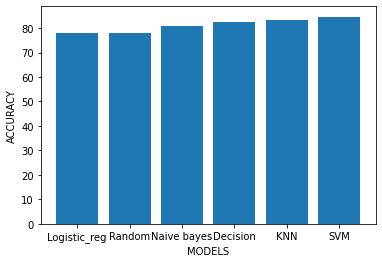

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
G = np.array([T,H,A,R,U,N])
G = np.sort(G)
models = np.array(['Logistic_reg','Random','Naive bayes','Decision','KNN','SVM'])
plt.bar(models,G)
plt.ylabel('ACCURACY')
plt.xlabel('MODELS')
plt.show()

In [ ]:
import pandas as pd
sk = {'Machine Learning Models': ['Logistic Regression','Random Forest','Naive bayes','Decision Tree','K Nearest Neighbours','Support Vector Machine'],'Accuracy in %':['77.80925795','78.08008','80.7799675','82.50489563','83.45485605','84.59022541']}
sks = pd.DataFrame(sk)
sks.sort_values(by=['Accuracy in %'],ascending=[False])

,Machine Learning Models,Accuracy in %
5,Support Vector Machine,84.59022541
4,K Nearest Neighbours,83.45485605
3,Decision Tree,82.50489563
2,Naive bayes,80.7799675
1,Random Forest,78.08008
0,Logistic Regression,77.80925795


- SVM HAS THE HIGHEST ACCURACY OF (84.59022541%)
- KNN HAS THE ACCURACY OF (83.45485605%)
- DECISION TREE HAS THE ACCURACY OF (82.50489563%)